## Scope Project
### Goals
Identify the relationship between the GDP and life expectancy of six countries

### Data
From the World Health Organization and the World Bank in a file ´all_data.csv´

### Analysis
GDP in these countries
Life expectancy in these countries
Correlation between GDP and Life expectancy



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### Load and view data

In [2]:
data_gdp = pd.read_csv('all_data.csv')

In [3]:
print(data_gdp.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
print(data_gdp.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [5]:
print(data_gdp.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [6]:
data_gdp.rename(columns={'Life expectancy at birth (years)': 'LEAB'}, inplace=True)
print(data_gdp.head())

  Country  Year  LEAB           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


In [7]:
print(data_gdp.LEAB.min())
print(data_gdp.LEAB.max())

44.3
81.0


In [8]:
print(data_gdp.GDP.min())
print(data_gdp.GDP.max())

4415702800.0
18100000000000.0


### Life expectancy at birth

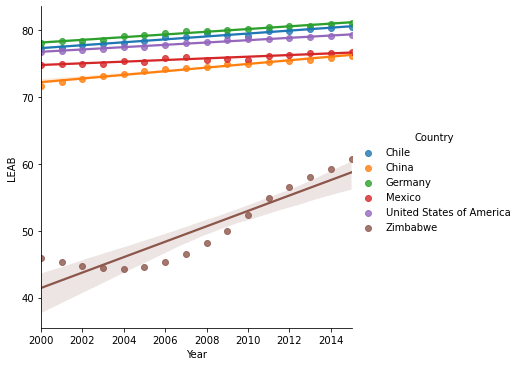

In [9]:
sns.lmplot(x="Year", y="LEAB", hue="Country", data=data_gdp)

plt.show()

Life expectancy has grown in all of six countries

### GDP

<Figure size 432x288 with 0 Axes>

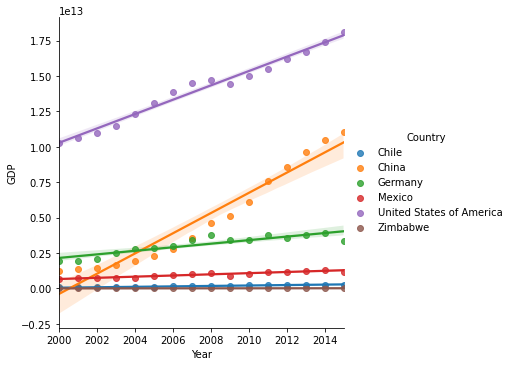

In [10]:
plt.clf()
sns.lmplot(x='Year', y='GDP', hue='Country', data=data_gdp)

plt.show()

GDP has grown in United States of America, China and Mexico. However it's not clear if GDP has grown in the others countries too

<Figure size 432x288 with 0 Axes>

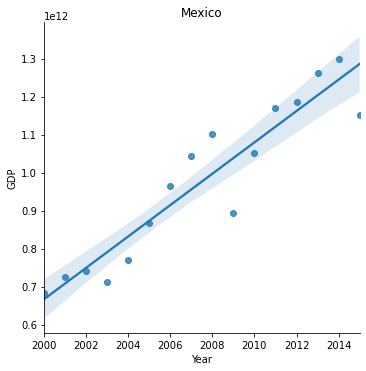

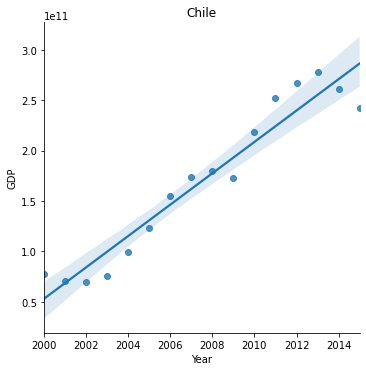

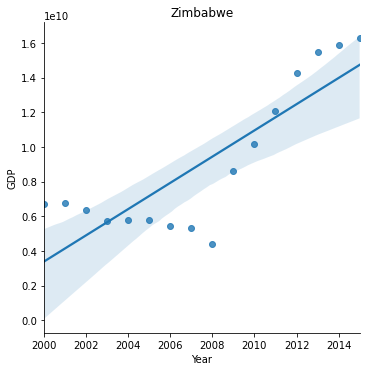

In [14]:
plt.clf()

sns.lmplot(x='Year', y='GDP', data=data_gdp[data_gdp.Country == 'Mexico'])
plt.title("Mexico")

sns.lmplot(x='Year', y='GDP', data=data_gdp[data_gdp.Country == 'Chile'])
plt.title("Chile")

sns.lmplot(x='Year', y='GDP', data=data_gdp[data_gdp.Country == 'Zimbabwe'])
plt.title("Zimbabwe")

plt.show()

Now we can see that the GDP has grown in all of six countries

### Relationship between LEAB and GDP

<Figure size 432x288 with 0 Axes>

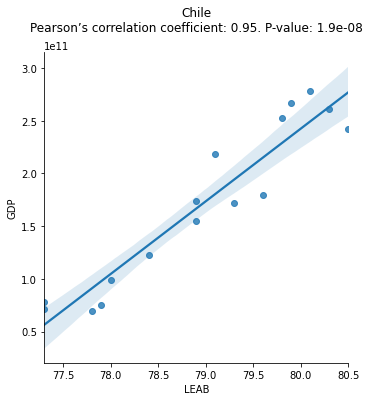

<Figure size 432x288 with 0 Axes>

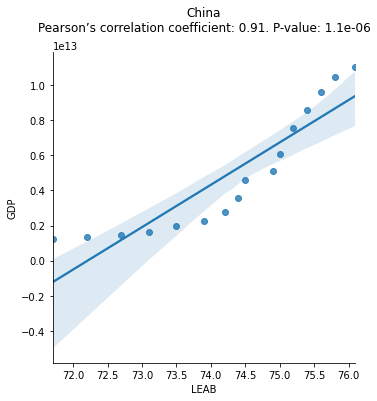

<Figure size 432x288 with 0 Axes>

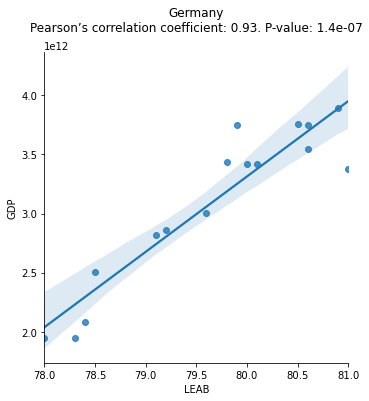

<Figure size 432x288 with 0 Axes>

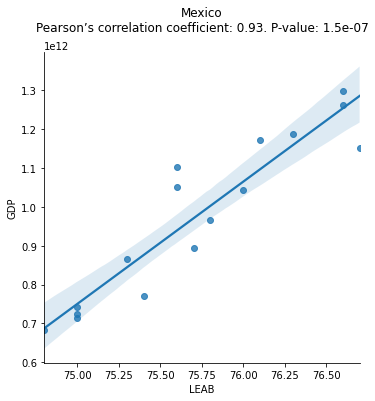

<Figure size 432x288 with 0 Axes>

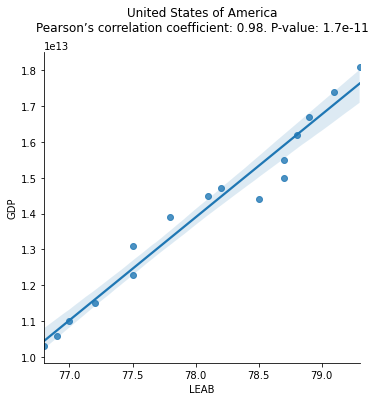

<Figure size 432x288 with 0 Axes>

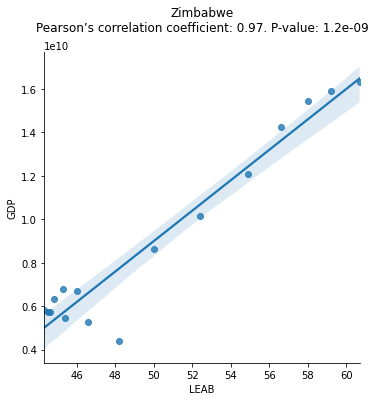

In [15]:
countries = data_gdp.Country.unique()

for country in countries:
    data_by_country = data_gdp[data_gdp.Country == country]
    
    r, pvalue = pearsonr(data_by_country.LEAB, data_by_country.GDP)
    
    plt.clf()
    sns.lmplot(x='LEAB', y='GDP', data=data_by_country)

    
    plt.title('{}\nPearson’s correlation coefficient: {:.2f}. P-value: {:.2g}\n'.format(country,r,pvalue))
    plt.show()

By country, correlation between GDP and Life expectancy is very high (correlation > 0.9) and positive, GDP and Life expectancy both grew.


                            Year      LEAB           GDP
Country                                                 
Chile                     2007.5  78.94375  1.697888e+11
China                     2007.5  74.26250  4.957714e+12
Germany                   2007.5  79.65625  3.094776e+12
Mexico                    2007.5  75.71875  9.766506e+11
United States of America  2007.5  78.06250  1.407500e+13
Zimbabwe                  2007.5  50.09375  9.062580e+09


<Figure size 432x288 with 0 Axes>

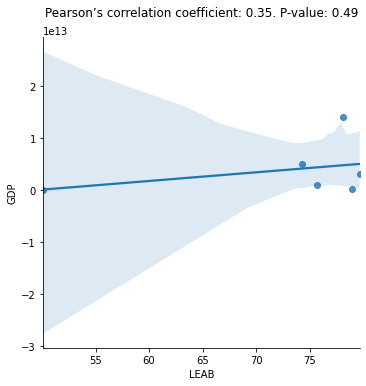

In [32]:
data_by_country = data_gdp.groupby(by='Country').mean()
print(data_by_country)

r, pvalue = pearsonr(data_by_country.LEAB, data_by_country.GDP)

plt.clf()

sns.lmplot(x='LEAB', y='GDP', data=data_by_country)
plt.title('Pearson’s correlation coefficient: {:.2f}. P-value: {:.2g}\n'.format(r,pvalue))

plt.show()

If we compare the mean by country, the correlation between GDP and LEAB is low (correlation > 0.3) and positive

           LEAB           GDP
Year                         
2000  70.766667  2.371583e+12
2001  70.833333  2.448752e+12
2002  70.950000  2.561221e+12
2003  71.033333  2.743446e+12
2004  71.300000  2.991647e+12
2005  71.483333  3.207074e+12
2006  71.950000  3.463349e+12
2007  72.300000  3.785750e+12
2008  72.666667  4.055986e+12
2009  73.066667  4.000653e+12
2010  73.483333  4.299587e+12
2011  74.200000  4.710965e+12
2012  74.600000  4.962082e+12
2013  74.966667  5.269258e+12
2014  75.316667  5.558059e+12
2015  75.716667  5.658565e+12


<Figure size 432x288 with 0 Axes>

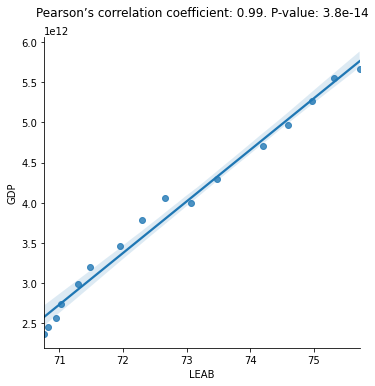

In [33]:
data_by_year = data_gdp.groupby(by='Year').mean()
print(data_by_year)

r, pvalue = pearsonr(data_by_year.LEAB, data_by_year.GDP)

plt.clf()

sns.lmplot(x='LEAB', y='GDP', data=data_by_year)
plt.title('Pearson’s correlation coefficient: {:.2f}. P-value: {:.2g}\n'.format(r,pvalue))

plt.show()

However if we compare the mean by year the correlation between DGP and LEAB is very strong again. That means DGP and LEAB both grew in those sex country year by year 